In [ ]:
import random

class Particle:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def move(self):
        self.x += random.uniform(-1, 1)
        self.y += random.uniform(-1, 1)

    def distance_to(self, other):
        return ((self.x - other.x) ** 2 + (self.y - other.y) ** 2) ** 0.5

class Crystal:
    def __init__(self, seed_x, seed_y):
        self.particles = [Particle(seed_x, seed_y)]

    def add_particle(self, particle):
        self.particles.append(particle)

    def is_particle_near(self, particle):
        for p in self.particles:
            if particle.distance_to(p) < 1:
                return True
        return False

def simulate_crystal_growth(num_particles):
    crystal = Crystal(0, 0)
    particles = [Particle(random.uniform(-10, 10), random.uniform(-10, 10)) for _ in range(num_particles)]
    while particles:
        for p in particles:
            p.move()
            if crystal.is_particle_near(p):
                crystal.add_particle(p)
                particles.remove(p)
                break
    return crystal

crystal = simulate_crystal_growth(100)
print(len(crystal.particles))

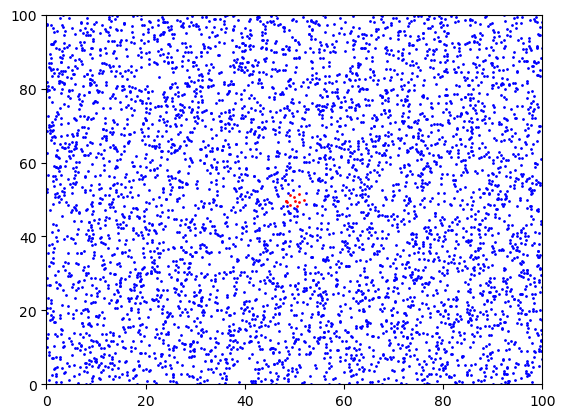

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the simulation parameters
n_particles = 5000  # number of particles
box_size = 100  # size of the simulation box
stick_radius = 1.5  # radius within which particles will stick to the crystal
stick_prob = 0.3  # probability of a particle sticking to the crystal
dt = 0.1  # time step

# Set up the initial seed of the crystal at the center of the box
crystal_radius = 2
crystal_center = np.array([box_size/2, box_size/2])

# Initialize particle positions randomly within the box
positions = np.random.uniform(low=0, high=box_size, size=(n_particles, 2))

# Initialize particle velocities randomly with a fixed magnitude
velocities = np.random.normal(loc=0, scale=1, size=(n_particles, 2))
velocities = velocities / np.linalg.norm(velocities, axis=1)[:, np.newaxis]

# Define a function to simulate one time step
def simulate_step(positions, velocities):
    # Update particle positions
    positions += velocities * dt

    # Check for particles that stick to the crystal
    for i in range(n_particles):
        distance = np.linalg.norm(positions[i] - crystal_center)
        if distance <= stick_radius and np.random.uniform() < stick_prob:
            velocities[i] = np.zeros(2)  # particle stops moving
            positions[i] = crystal_center  # particle sticks to the crystal

    # Check for particle-wall collisions
    for i in range(n_particles):
        if positions[i, 0] < 0:
            positions[i, 0] = -positions[i, 0]
            velocities[i, 0] = -velocities[i, 0]
        elif positions[i, 0] > box_size:
            positions[i, 0] = 2*box_size - positions[i, 0]
            velocities[i, 0] = -velocities[i, 0]
        if positions[i, 1] < 0:
            positions[i, 1] = -positions[i, 1]
            velocities[i, 1] = -velocities[i, 1]
        elif positions[i, 1] > box_size:
            positions[i, 1] = 2*box_size - positions[i, 1]
            velocities[i, 1] = -velocities[i, 1]

    return positions, velocities

# Simulate the growth of the crystal over time
positions_history = [positions.copy()]
velocities_history = [velocities.copy()]
for t in range(1000):
    positions, velocities = simulate_step(positions, velocities)
    positions_history.append(positions.copy())
    velocities_history.append(velocities.copy())

# Visualize the crystal growth over time
fig, ax = plt.subplots()
for t in range(len(positions_history)):
    crystal_mask = np.linalg.norm(positions_history[t] - crystal_center, axis=1) <= crystal_radius
    ax.scatter(positions_history[t][~crystal_mask, 0], positions_history[t][~crystal_mask, 1], s=1, c='b')
    ax.scatter(positions_history[t][crystal_mask, 0], positions_history[t][crystal_mask, 1], s=1, c='r')
    ax.set_xlim([0, box_size])
    ax.set_ylim([0, box_size])
    plt.pause(0.01)
    ax.clear()

plt.show()
